In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import json
from utils import *
from IPython.display import display
import pandas as pd
import seaborn as sns
import collections
from matplotlib import pyplot as plt

# Ours

In [2]:
data = load_to_df('data/twitter_data.json')
filtered_data = data[(data["timeline"].isin(["Engagement", "Chronological"])) & (data["shown_to_user"])]

100%|██████████| 1730/1730 [00:03<00:00, 501.92it/s]


In [3]:
# Add a new column weight_alt that is the inverse of the number of users per user_id
filtered_data["weight"] = 1 / filtered_data.groupby("user_id")["user_id"].transform("count")

/var/folders/qc/bdvg83v530n09zhg0k9s7z_m0000gn/T/ipykernel_7810/537387336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["weight"] = 1 / filtered_data.groupby("user_id")["user_id"].transform("count")


In [4]:
for attr in ["user_gender", 
             "user_ideo_political_party", 
             "user_pol_party_further",
             "user_summary_party",
             "user_ideo_political_leaning",
             "user_pol_leaning_further",
             "user_summary_leaning_text",
             "user_education_level", 
             "user_main_why_tweet", 
             "user_age_group",
             "user_annual_household_income"]:
    df = filtered_data.groupby(attr)['weight'].sum().to_frame()
    df['pct'] = df["weight"] / df["weight"].sum() * 100
    df.loc['Total'] = df.sum(numeric_only=True)
    display(df)

,weight,pct
user_gender,,
Man,410.255814,50.900225
Non-binary,20.777778,2.577888
Other,3.966408,0.492110
Woman,371.000000,46.029777
Total,806.000000,100.000000


,weight,pct
user_ideo_political_party,,
Democrat,452.511337,56.142846
Independent,204.417082,25.361921
Republican,111.083478,13.782069
Something else,37.988103,4.713164
Total,806.000000,100.000000


,weight,pct
user_pol_party_further,,
The Democratic Party,172.460370,71.145496
The Republican Party,69.944815,28.854504
Total,242.405185,100.000000


,weight,pct
user_summary_party,,
Democrat,624.971707,77.539914
Republican,181.028293,22.460086
Total,806.000000,100.000000


,weight,pct
user_ideo_political_leaning,,
Far left,168.868659,20.951447
Far right,25.289395,3.137642
Left,325.557446,40.391743
Moderate,195.306201,24.231539
Other,5.115762,0.634710
Right,85.862537,10.652920
Total,806.000000,100.000000


,weight,pct
user_pol_leaning_further,,
Towards the Left,126.141618,62.938021
Towards the Right,74.280345,37.061979
Total,200.421963,100.000000


,weight,pct
user_summary_leaning_text,,
Left-leaning,620.567722,76.993514
Right-leaning,185.432278,23.006486
Total,806.000000,100.000000


,weight,pct
user_education_level,,
Associate degree,103.442670,12.834078
Bachelor's degree,311.181437,38.608119
High school graduate,241.910430,30.013701
Master's degree or above,127.672131,15.840215
Other,14.855789,1.843150
Prefer not to answer,1.115942,0.138454
Some high school,5.821601,0.722283
Total,806.000000,100.000000


,weight,pct
user_main_why_tweet,,
A way to express my opinions,21.822037,2.707449
A way to stay informed,293.906990,36.464887
Entertainment,397.406349,49.305999
It's useful for my job or school,28.180272,3.496312
Keeping me connected to other people,48.164472,5.975741
Lets me see different points of view,16.519880,2.049613
Total,806.000000,100.000000


,weight,pct
user_age_group,,
18-24 years old,119.333333,14.805624
25-34 years old,307.240196,38.119131
35-44 years old,211.744652,26.271049
45-54 years old,92.681818,11.498985
55-64 years old,50.328358,6.244213
65-74 years old,23.671642,2.936928
75 years or older,1.000000,0.124069
Total,806.000000,100.000000


,weight,pct
user_annual_household_income,,
"$100,000 - $200,000",147.062991,18.246029
"$25,000 - $50,000",189.923602,23.563722
"$50,000 - $100,000",301.259000,37.377047
"Less than $25,000",117.402177,14.566027
"More than $200,000",34.399661,4.267948
Prefer not to say,15.952570,1.979227
Total,806.000000,100.000000


In [5]:
# Primary content category, unoptimized
weights = filtered_data["weight"]
primary_content_category = collections.Counter()

for i, c_cats in enumerate(filtered_data["content_category"]):
    for c_cat in c_cats:
        primary_content_category[c_cat] += weights.iloc[i]

# Create df where index are the keys and values are the weights
df = pd.DataFrame({"primary_content_category": primary_content_category.keys(), "weight": primary_content_category.values(), "pct": [primary_content_category[key] / sum(primary_content_category.values()) * 100 for key in primary_content_category.keys()]})
df.set_index("primary_content_category", inplace=True)
df.loc["Total"] = df.sum(numeric_only=True)
df

,weight,pct
primary_content_category,,
Entertainment,424.537097,29.237948
Other,103.862876,7.153055
Politics,493.070485,33.957855
News,268.705569,18.505802
Hobbies,148.812825,10.248767
Work,13.018304,0.896573
Total,1452.007157,100.000000


In [6]:
gender_df = filtered_data.groupby("user_gender")['weight'].sum().to_frame()
gender_df['pct'] = gender_df["weight"] / gender_df["weight"].sum() * 100

politic_df = filtered_data.groupby("user_ideo_political_party")['weight'].sum().to_frame()
politic_df['pct'] = politic_df["weight"] / politic_df["weight"].sum() * 100

edu_df = filtered_data.groupby("user_education_level")['weight'].sum().to_frame()
edu_df['pct'] = edu_df["weight"] / edu_df["weight"].sum() * 100

age_df = filtered_data.groupby("user_age_group")['weight'].sum().to_frame()
age_df['pct'] = age_df["weight"] / age_df["weight"].sum() * 100

In [7]:
filtered_data["user_ethnicity"] = filtered_data["user_ethnicity"].apply(str)
filtered_data["user_race"] = filtered_data["user_race"].apply(str)

/var/folders/qc/bdvg83v530n09zhg0k9s7z_m0000gn/T/ipykernel_7810/568260541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["user_ethnicity"] = filtered_data["user_ethnicity"].apply(str)
/var/folders/qc/bdvg83v530n09zhg0k9s7z_m0000gn/T/ipykernel_7810/568260541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["user_race"] = filtered_data["user_race"].apply(str)


In [8]:
# Before adjusting to match ANES categories.
for attr in ["user_race", 
             "user_ethnicity"]:
    series = filtered_data.groupby(attr)['weight'].sum()
    key_in_lst = []
    for key in series.index:
        key_in_lst.append(json.loads(key.replace('\'', '"')))
    single_key_dict = {}
    for single_key in set([item for sublist in key_in_lst for item in sublist]):
        for i, key_lst in enumerate(key_in_lst):
            if single_key in key_lst:
                single_key_dict[single_key] = single_key_dict.get(single_key, 0) + series[i]
    df = pd.DataFrame.from_dict(single_key_dict, orient='index')
    df.columns = ["weight"]
    df['pct'] = df["weight"] / df["weight"].sum() * 100
    df.loc['Total'] = df.sum(numeric_only=True)
    display(df)

/var/folders/qc/bdvg83v530n09zhg0k9s7z_m0000gn/T/ipykernel_7810/134113905.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  single_key_dict[single_key] = single_key_dict.get(single_key, 0) + series[i]


,weight,pct
Other,26.343728,3.112314
Native Hawaiian or Pacific Islander,1.352941,0.159840
American Indian or Alaska Native,15.169786,1.792197
White,619.145161,73.147367
Asian,76.423714,9.028890
Black or African American,108.000000,12.759392
Total,846.435330,100.000000


/var/folders/qc/bdvg83v530n09zhg0k9s7z_m0000gn/T/ipykernel_7810/134113905.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  single_key_dict[single_key] = single_key_dict.get(single_key, 0) + series[i]


,weight,pct
Hispanic,54.281017,6.509818
Spanish,12.500000,1.499101
Latino,41.052137,4.923303
None of these,726.000000,87.067778
Total,833.833154,100.000000


In [9]:
# Adjust race to match ANES categories
filtered_data.loc[filtered_data['user_ethnicity'].str.contains("Hispanic|Spanish|Latino"), "user_race"] = "['Hispanic']"

In [10]:
# Construct race df
race_summary_dct = {"pct": filtered_data.groupby("user_summary_race")['weight'].sum() / (filtered_data.groupby("user_summary_race")['weight'].sum()).sum(), "weight": filtered_data.groupby("user_summary_race")['weight'].sum()}
race_df = pd.DataFrame(race_summary_dct)
print(race_summary_dct["weight"].sum())
race_df


806.0


,pct,weight
user_summary_race,,
American Indian/Alaska Native or Other,0.010972,8.843728
Asian or Native Hawaiian/other Pacific Islander,0.077557,62.511111
Black or African American,0.109470,88.232558
Hispanic,0.099559,80.244444
"Multiple races, non-Hispanic",0.034659,27.935330
White,0.667783,538.232828


# ANES

## Load and process ANES data

In [19]:
anes_df = pd.read_csv('data/anes.csv')

/var/folders/qc/bdvg83v530n09zhg0k9s7z_m0000gn/T/ipykernel_7810/3074668685.py:1: DtypeWarning: Columns (15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,1508,1509) have mixed types. Specify dtype option on import or set low_memory=False.
  anes_df = pd.read_csv('data/anes.csv')


In [20]:
cols = {
    'V202544': 'twitter_use_frequency',
    'V200010a': 'weight',
    'V201510': 'education',
    'V201228': 'party_id',
    'V201231x': 'final_party_id',
    'V201507x': 'age',
    'V201600': 'sex',
    'V201549x': 'race',
}
anes_df.rename(columns=cols, inplace=True)
anes_df

,version,V200001,V160001_orig,V200002,V200003,V200004,V200005,V200006,V200007,V200008,...,V203518,V203519,V203520,V203521,V203522,V203523,V203524,V203525,V203526,V203527
0,ANES2020TimeSeries_20220210,200015,401318,3,2,3,0,-2,-2,-2,...,Thomas Jeffery 'Tom' Cole,1,-1. Inapplicable,-1,-1,82,-1. Inapplicable,-1,-1. Inapplicable,-1
1,ANES2020TimeSeries_20220210,200022,300261,3,2,3,0,4,-1,3,...,Michael Keith 'Mike' Simpson,1,-1. Inapplicable,-1,-1,-1,-1. Inapplicable,-1,-1. Inapplicable,-1
2,ANES2020TimeSeries_20220210,200039,400181,3,2,3,0,-2,-2,-2,...,Scott William Taylor,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
3,ANES2020TimeSeries_20220210,200046,300171,3,2,3,0,-2,-2,-2,...,Devin Gerald Nunes,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
4,ANES2020TimeSeries_20220210,200053,405145,3,2,3,1,-2,-2,-2,...,Kenneth R. 'Ken' Buck,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,ANES2020TimeSeries_20220210,535315,-1,1,6,3,0,-2,-2,-2,...,Neal Patrick Dunn,1,-1. Inapplicable,-1,-1,82,-1. Inapplicable,-1,-1. Inapplicable,-1
8276,ANES2020TimeSeries_20220210,535360,-1,1,6,3,0,1,1,1,...,Michael Keith 'Mike' Simpson,1,-1. Inapplicable,-1,-1,-1,-1. Inapplicable,-1,-1. Inapplicable,-1
8277,ANES2020TimeSeries_20220210,535414,-1,2,6,3,0,-2,-2,-2,...,Kenneth S. 'Ken' Calvert,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
8278,ANES2020TimeSeries_20220210,535421,-1,3,6,3,0,-2,-2,-2,...,Robert J. 'Rob' Wittman,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1


In [21]:
education_values = {
    -9: 'Refused',
    1: 'Less than high school credential',
    2: 'High school graduate - High school diploma or equivalent (e.g. GED)',
    3: 'Some college but no degree',
    4: 'Associate degree in college - Occupational/vocational program',
    5: 'Associate degree in college - Academic program',
    6: 'Bachelor\'s degree (e.g., BA, AB, BS)',
    7: 'Master\'s degree (e.g., MA, MS, MEng, MEd, MSW, MBA)',
    8: 'Professional school degree (e.g. MD, DDS, DVM, LLB, JD)/Doctoral degree (e.g. PHD, EDD)',
    95: 'Other {SPECIFY}' 
}
anes_df['education'].replace(education_values, inplace=True)
anes_df['education'] = pd.Categorical(anes_df['education'], education_values.values(), ordered=True)

In [22]:
party_id_values = {
    1: 'Democrat',
    2: 'Republican',
    3: 'Independent',
    5: 'Other party {SPECIFY}'
}
anes_df['party_id'].replace(party_id_values, inplace=True)
anes_df['party_id'] = pd.Categorical(anes_df['party_id'], party_id_values.values(), ordered=True)

In [23]:
sex_values = {
    1: 'Male',
    2: 'Female',
}
anes_df['sex'].replace(sex_values, inplace=True)
anes_df['sex'] = pd.Categorical(anes_df['sex'], sex_values.values(), ordered=True)

In [24]:
race_values = {
1: 'White, non-Hispanic',
2: 'Black, non-Hispanic',
3: 'Hispanic',
4: 'Asian or Native Hawaiian/other Pacific Islander, non-Hispanic alone',
5: 'Native American/Alaska Native or other race, non-Hispanic alone',
6: 'Multiple races, non-Hispanic',
}
anes_df['race'].replace(race_values, inplace=True)
anes_df['race'] = pd.Categorical(anes_df['race'], race_values.values(), ordered=True)

## Get %s of demographics

In [25]:
# Filter to users who used Twitter at least a few times a week
tw_anes_df = anes_df[anes_df['twitter_use_frequency'].isin([1, 2, 3, 4])]
tw_anes_df

,version,V200001,V160001_orig,V200002,V200003,V200004,V200005,V200006,V200007,V200008,...,V203518,V203519,V203520,V203521,V203522,V203523,V203524,V203525,V203526,V203527
0,ANES2020TimeSeries_20220210,200015,401318,3,2,3,0,-2,-2,-2,...,Thomas Jeffery 'Tom' Cole,1,-1. Inapplicable,-1,-1,82,-1. Inapplicable,-1,-1. Inapplicable,-1
2,ANES2020TimeSeries_20220210,200039,400181,3,2,3,0,-2,-2,-2,...,Scott William Taylor,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
9,ANES2020TimeSeries_20220210,200114,402782,3,2,3,1,4,-1,3,...,C. Antonio Delgado,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
13,ANES2020TimeSeries_20220210,200169,401642,3,2,3,0,-2,-2,-2,...,Manga Manga Anantatmula,2,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
16,ANES2020TimeSeries_20220210,200190,300234,3,2,3,0,-2,-2,-2,...,Caroline Colarusso,2,-1. Inapplicable,-1,-1,82,-1. Inapplicable,-1,-1. Inapplicable,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,ANES2020TimeSeries_20220210,533944,-1,1,6,3,0,-2,-2,-2,...,Constantin Jean-Pierre,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
8256,ANES2020TimeSeries_20220210,534534,-1,1,6,3,0,-2,-2,-2,...,Rosemerry Becchi,2,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
8259,ANES2020TimeSeries_20220210,534633,-1,3,6,3,1,1,1,5,...,Caroline Colarusso,2,-1. Inapplicable,-1,-1,82,-1. Inapplicable,-1,-1. Inapplicable,-1
8262,ANES2020TimeSeries_20220210,534787,-1,3,6,3,0,-2,-2,-2,...,Brandon Ray Martin,1,-1. Inapplicable,-1,-1,82,-1. Inapplicable,-1,-1. Inapplicable,-1


## Education level

In [59]:
# calculate percentages of each education level using `weights` col as weights
edu_anes_df = tw_anes_df[~tw_anes_df["education"].isna()]
weight_by_education = edu_anes_df.groupby('education')["weight"].sum()


/var/folders/qc/bdvg83v530n09zhg0k9s7z_m0000gn/T/ipykernel_7810/606394948.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weight_by_education = edu_anes_df.groupby('education')["weight"].sum()


In [27]:
# get sum of percentages for education with at least a bachelor's degree
pct_at_least_bach = weight_by_education.loc[
    'Bachelor\'s degree (e.g., BA, AB, BS)'
    :'Professional school degree (e.g. MD, DDS, DVM, LLB, JD)/Doctoral degree (e.g. PHD, EDD)'].sum()
print(f'Percentage with at least a Bachelor\'s degree: {pct_at_least_bach.sum() / weight_by_education.sum() * 100:.2f}')

Percentage with at least a Bachelor's degree: 48.36


In [28]:
# Change to fit study proper bins.

# Change the index labels
weight_by_education["Master's degree or above"] = weight_by_education["Master's degree (e.g., MA, MS, MEng, MEd, MSW, MBA)"] + weight_by_education["Professional school degree (e.g. MD, DDS, DVM, LLB, JD)/Doctoral degree (e.g. PHD, EDD)"]
weight_by_education["Associate degree"] = weight_by_education["Associate degree in college - Occupational/vocational program"] + weight_by_education["Associate degree in college - Academic program"]

# Change the index labels 
weight_by_education.rename({'Less than high school credential': 'Some high school', 'High school graduate - High school diploma or equivalent (e.g. GED)': 'High school graduate', "Bachelor's degree (e.g., BA, AB, BS)": "Bachelor's degree", "Refused": "Prefer not to answer", "Other {SPECIFY}": "Other"}, inplace=True)
weight_by_education["High school graduate"] = weight_by_education["High school graduate"] + weight_by_education["Some college but no degree"]
weight_by_education.drop(labels = ["Some college but no degree", "Master's degree (e.g., MA, MS, MEng, MEd, MSW, MBA)", "Professional school degree (e.g. MD, DDS, DVM, LLB, JD)/Doctoral degree (e.g. PHD, EDD)", "Associate degree in college - Occupational/vocational program", "Prefer not to answer", "Associate degree in college - Academic program"], inplace=True)
pct_by_education = weight_by_education / weight_by_education.sum() * 100

In [29]:
edu_anes = pd.DataFrame()
edu_anes['pct'] = pct_by_education
edu_anes['weight'] = weight_by_education
edu_anes

,pct,weight
education,,
Some high school,3.447799,38.932188
High school graduate,38.846452,438.650096
Bachelor's degree,31.735725,358.356505
Other,1.299166,14.670042
Master's degree or above,16.628485,187.767125
Associate degree,8.042372,90.813630


## Pol party

In [30]:
weight_by_party = tw_anes_df.groupby('party_id')['weight'].sum()
weight_by_party.rename({'Other party {SPECIFY}': 'Other'}, inplace=True)
pct_by_party = weight_by_party / weight_by_party.sum() * 100
party_anes = pd.DataFrame()
party_anes["pct"] = pct_by_party
party_anes["weight"] = weight_by_party
party_anes

/var/folders/qc/bdvg83v530n09zhg0k9s7z_m0000gn/T/ipykernel_7810/164992176.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weight_by_party = tw_anes_df.groupby('party_id')['weight'].sum()


,pct,weight
party_id,,
Democrat,41.641441,468.690953
Republican,20.914910,235.405616
Independent,34.985471,393.775374
Other,2.458179,27.667776


## Age

In [31]:
weight_by_age = tw_anes_df.groupby('age')["weight"].sum().reset_index().rename(columns={0: 'weight'})
weight_by_age

,age,weight
0,-9,30.218646
1,18,35.957998
2,19,47.370775
3,20,27.025706
4,21,56.375913
...,...,...
59,76,3.724956
60,77,2.121436
61,78,2.687491
62,79,0.987934


In [32]:
# Convert weight_by_age to fit within the bins, these are left exclusive, right inclusive 
bins = [17, 24, 34, 44, 54, 64, 74, 100]
weight_by_age['age_bin'] = pd.cut(weight_by_age['age'], bins)
weight_by_age.dropna(inplace=True)
weight_by_age

,age,weight,age_bin
1,18,35.957998,"(17, 24]"
2,19,47.370775,"(17, 24]"
3,20,27.025706,"(17, 24]"
4,21,56.375913,"(17, 24]"
5,22,33.507614,"(17, 24]"
...,...,...,...
59,76,3.724956,"(74, 100]"
60,77,2.121436,"(74, 100]"
61,78,2.687491,"(74, 100]"
62,79,0.987934,"(74, 100]"


In [33]:
age_anes = weight_by_age.groupby("age_bin").sum().drop(columns="age")
age_anes["pct"] = age_anes["weight"] / age_anes["weight"].sum() * 100
age_anes.reset_index(inplace=True)
age_anes

/var/folders/qc/bdvg83v530n09zhg0k9s7z_m0000gn/T/ipykernel_7810/3283275387.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_anes = weight_by_age.groupby("age_bin").sum().drop(columns="age")


,age_bin,weight,pct
0,"(17, 24]",276.055684,25.119471
1,"(24, 34]",215.847206,19.640847
2,"(34, 44]",216.231140,19.675783
3,"(44, 54]",156.591543,14.248925
4,"(54, 64]",142.847924,12.998335
5,"(64, 74]",66.983511,6.095112
6,"(74, 100]",24.413933,2.221527


## Sex

In [34]:
pct_by_sex = tw_anes_df.groupby('sex').apply(lambda x: x['weight'].sum() / tw_anes_df['weight'].sum()) * 100
weight_by_sex = tw_anes_df.groupby('sex')['weight'].sum()
sex_anes = pd.DataFrame()
sex_anes["pct"] = pct_by_sex
sex_anes["weight"] = weight_by_sex
sex_anes

/var/folders/qc/bdvg83v530n09zhg0k9s7z_m0000gn/T/ipykernel_7810/3638161390.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pct_by_sex = tw_anes_df.groupby('sex').apply(lambda x: x['weight'].sum() / tw_anes_df['weight'].sum()) * 100
/var/folders/qc/bdvg83v530n09zhg0k9s7z_m0000gn/T/ipykernel_7810/3638161390.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weight_by_sex = tw_anes_df.groupby('sex')['weight'].sum()


,pct,weight
sex,,
Male,55.636365,628.240043
Female,43.978774,496.603735


## Race

In [35]:
# Drop rows with race equal to NaN
filtered_race_df = tw_anes_df[~tw_anes_df['race'].isna()]

In [36]:
pct_by_race = filtered_race_df.groupby('race').apply(lambda x: x['weight'].sum() / filtered_race_df['weight'].sum()) * 100
pct_by_race

/var/folders/qc/bdvg83v530n09zhg0k9s7z_m0000gn/T/ipykernel_7810/3207113451.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pct_by_race = filtered_race_df.groupby('race').apply(lambda x: x['weight'].sum() / filtered_race_df['weight'].sum()) * 100


race
White, non-Hispanic                                                    63.330073
Black, non-Hispanic                                                     8.726709
Hispanic                                                               15.428805
Asian or Native Hawaiian/other Pacific Islander, non-Hispanic alone     6.179825
Native American/Alaska Native or other race, non-Hispanic alone         1.948663
Multiple races, non-Hispanic                                            4.385926
dtype: float64

In [37]:
weight_by_race = filtered_race_df.groupby('race').apply(lambda x: x['weight'].sum()).to_frame()
weight_by_race.rename(columns = {0: "weight"}, inplace=True)
race_anes = weight_by_race
race_anes["pct"] = race_anes["weight"] / race_anes["weight"].sum() * 100
race_anes.index = race_anes.index.map({"White, non-Hispanic": 'White', "Black, non-Hispanic": 'Black or African American', "Asian or Native Hawaiian/other Pacific Islander, non-Hispanic alone":"Asian or Native Hawaiian/other Pacific Islander", "Native American/Alaska Native or other race, non-Hispanic alone": "American Indian/Alaska Native or Other", "Multiple races, non-Hispanic": "Multiple races, non-Hispanic", "Hispanic": "Hispanic"})
race_anes

/var/folders/qc/bdvg83v530n09zhg0k9s7z_m0000gn/T/ipykernel_7810/3052533250.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weight_by_race = filtered_race_df.groupby('race').apply(lambda x: x['weight'].sum()).to_frame()


,weight,pct
race,,
White,712.314600,63.330073
Black or African American,98.154977,8.726709
Hispanic,173.537824,15.428805
Asian or Native Hawaiian/other Pacific Islander,69.508517,6.179825
American Indian/Alaska Native or Other,21.917879,1.948663
"Multiple races, non-Hispanic",49.331369,4.385926


# Comparison

## Education

In [38]:
edu_df_anes = edu_anes
edu_df_anes["pct"] = edu_df_anes["pct"] / edu_df_anes["pct"].sum() * 100
edu_df_anes.loc["Total"] = edu_df_anes.sum()
edu_df_anes['Source'] = "ANES"
edu_df_anes

,pct,weight,Source
education,,,
Some high school,3.447799,38.932188,ANES
High school graduate,38.846452,438.650096,ANES
Bachelor's degree,31.735725,358.356505,ANES
Other,1.299166,14.670042,ANES
Master's degree or above,16.628485,187.767125,ANES
Associate degree,8.042372,90.813630,ANES
Total,100.000000,1129.189587,ANES


In [39]:
edu_df_proper = edu_df
edu_df_proper["pct"] = edu_df_proper["pct"] / edu_df_proper["pct"].sum() * 100
edu_df_proper.loc["Total"] = edu_df_proper.sum()
edu_df_proper['Source'] = "Ours"
edu_df_proper

,weight,pct,Source
user_education_level,,,
Associate degree,103.442670,12.834078,Ours
Bachelor's degree,311.181437,38.608119,Ours
High school graduate,241.910430,30.013701,Ours
Master's degree or above,127.672131,15.840215,Ours
Other,14.855789,1.843150,Ours
Prefer not to answer,1.115942,0.138454,Ours
Some high school,5.821601,0.722283,Ours
Total,806.000000,100.000000,Ours


In [40]:
# Concatenate weight_by_education and edu_df_plot together to be graphable on the same graph
edu_graphable = pd.concat([edu_df_anes, edu_df_proper], axis=0)
edu_graphable.drop("Total", axis=0, inplace=True)
edu_graphable.reset_index(inplace=True)
edu_graphable

,index,pct,weight,Source
0,Some high school,3.447799,38.932188,ANES
1,High school graduate,38.846452,438.650096,ANES
2,Bachelor's degree,31.735725,358.356505,ANES
3,Other,1.299166,14.670042,ANES
4,Master's degree or above,16.628485,187.767125,ANES
5,Associate degree,8.042372,90.813630,ANES
6,Associate degree,12.834078,103.442670,Ours
7,Bachelor's degree,38.608119,311.181437,Ours
8,High school graduate,30.013701,241.910430,Ours
9,Master's degree or above,15.840215,127.672131,Ours


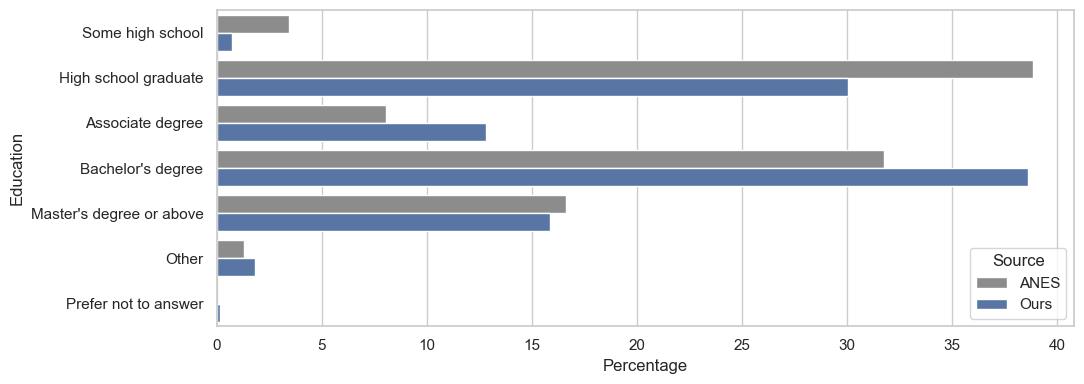

In [41]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(11, 4))
sns.barplot(data=edu_graphable, x="pct", y="index", hue="Source", order=["Some high school", "High school graduate", "Associate degree", "Bachelor's degree", "Master's degree or above", "Other", "Prefer not to answer"], palette=[sns.color_palette()[7], sns.color_palette()[0]], ax=ax)
plt.xlabel("Percentage")
plt.ylabel("Education")
plt.tight_layout()
plt.savefig("figures/ANES/education_comparative.pdf")

## Party

In [42]:
poli_df_anes = party_anes
poli_df_anes["pct"] = poli_df_anes["pct"] / poli_df_anes["pct"].sum() * 100
poli_df_anes.loc["Total"] = poli_df_anes.sum()
poli_df_anes["Source"] = "ANES"
poli_df_anes

,pct,weight,Source
party_id,,,
Democrat,41.641441,468.690953,ANES
Republican,20.914910,235.405616,ANES
Independent,34.985471,393.775374,ANES
Other,2.458179,27.667776,ANES
Total,100.000000,1125.539718,ANES


In [43]:
poli_df_proper = politic_df
poli_df_proper.rename({"Something else": "Other"}, inplace=True)
poli_df_proper["pct"] = poli_df_proper["pct"] / poli_df_proper["pct"].sum() * 100
poli_df_proper.loc["Total"] = poli_df_proper.sum()
poli_df_proper["Source"] = "Ours"
poli_df_proper

,weight,pct,Source
user_ideo_political_party,,,
Democrat,452.511337,56.142846,Ours
Independent,204.417082,25.361921,Ours
Republican,111.083478,13.782069,Ours
Other,37.988103,4.713164,Ours
Total,806.000000,100.000000,Ours


In [44]:
poli_graphable = pd.concat([poli_df_anes, poli_df_proper], axis=0)
poli_graphable.drop("Total", axis=0, inplace=True)
poli_graphable.reset_index(inplace=True)
poli_graphable

,index,pct,weight,Source
0,Democrat,41.641441,468.690953,ANES
1,Republican,20.914910,235.405616,ANES
2,Independent,34.985471,393.775374,ANES
3,Other,2.458179,27.667776,ANES
4,Democrat,56.142846,452.511337,Ours
5,Independent,25.361921,204.417082,Ours
6,Republican,13.782069,111.083478,Ours
7,Other,4.713164,37.988103,Ours


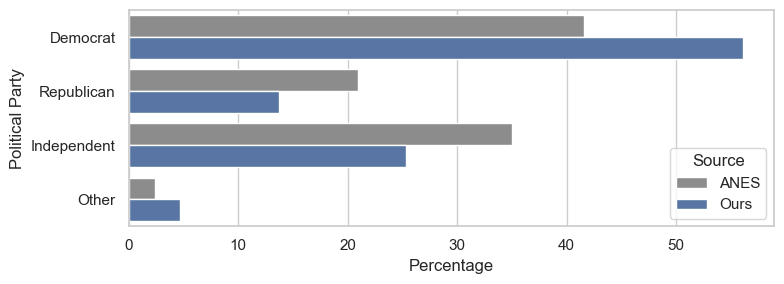

In [45]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.set_theme(style="whitegrid")
sns.barplot(data=poli_graphable, x="pct", y="index", hue="Source", palette=[sns.color_palette()[7], sns.color_palette()[0]], ax=ax)
plt.xlabel("Percentage")
plt.ylabel("Political Party")
plt.tight_layout()
plt.savefig("figures/ANES/political_party_comparative.pdf")

## Sex

In [46]:
#sex
sex_df_anes = sex_anes
sex_df_anes["pct"] = sex_df_anes["pct"] / sex_df_anes["pct"].sum() * 100
sex_df_anes.loc["Total"] = sex_df_anes.sum()
sex_df_anes["Source"] = "ANES"
sex_df_anes


,pct,weight,Source
sex,,,
Male,55.851315,628.240043,ANES
Female,44.148685,496.603735,ANES
Total,100.000000,1124.843778,ANES


In [47]:
sex_df_proper = gender_df
sex_df_proper.drop(["Non-binary", "Other"], inplace=True)
sex_df_proper.rename({"Woman": "Female", "Man": "Male"}, inplace=True)
sex_df_proper["pct"] = sex_df_proper["pct"] / sex_df_proper["pct"].sum() * 100
sex_df_proper.loc["Total"] = sex_df_proper.sum()
sex_df_proper["Source"] = "Ours"
sex_df_proper

,weight,pct,Source
user_gender,,,
Male,410.255814,52.512353,Ours
Female,371.000000,47.487647,Ours
Total,781.255814,100.000000,Ours


In [48]:
sex_graphable = pd.concat([sex_df_anes, sex_df_proper], axis=0)
sex_graphable.drop("Total", axis=0, inplace=True)
sex_graphable.reset_index(inplace=True)
sex_graphable

,index,pct,weight,Source
0,Male,55.851315,628.240043,ANES
1,Female,44.148685,496.603735,ANES
2,Male,52.512353,410.255814,Ours
3,Female,47.487647,371.000000,Ours


In [49]:
sex_graphable["index"] = sex_graphable["index"].map(lambda x: "Male\n\nMan" if x == "Male" else "Female\n\nWoman")
sex_graphable

,index,pct,weight,Source
0,Male\n\nMan,55.851315,628.240043,ANES
1,Female\n\nWoman,44.148685,496.603735,ANES
2,Male\n\nMan,52.512353,410.255814,Ours
3,Female\n\nWoman,47.487647,371.000000,Ours


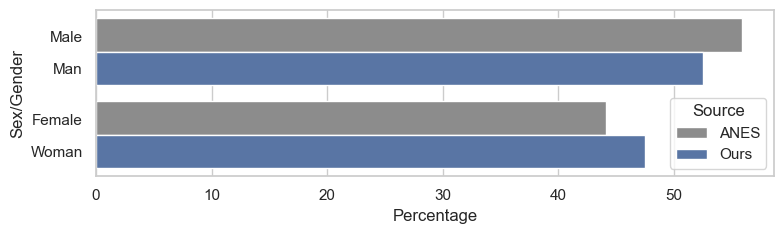

In [50]:
fig, ax = plt.subplots(figsize=(8, 2.5))
sns.set_theme(style="whitegrid")
sns.barplot(data=sex_graphable, x="pct", y="index", hue="Source", palette=[sns.color_palette()[7], sns.color_palette()[0]], ax=ax)
plt.xlabel("Percentage")
plt.ylabel("Sex/Gender")
plt.tight_layout()
plt.savefig("figures/ANES/gender_sex_comparative.pdf")

## Age

In [51]:
age_df_anes = age_anes
age_df_anes["age_bin"] = age_df_anes["age_bin"].astype(str)
age_df_anes["age_bin"] = age_df_anes["age_bin"].map({"(17, 24]": "18-24 years old", "(24, 34]": "25-34 years old", "(34, 44]": "35-44 years old", "(44, 54]": "45-54 years old", "(54, 64]": "55-64 years old", "(64, 74]": "65-74 years old", "(74, 100]": "75 years or older"})
age_df_anes.set_index("age_bin", inplace=True)
age_df_anes["pct"] = age_df_anes["pct"] / age_df_anes["pct"].sum() * 100
age_df_anes.loc["Total"] = age_df_anes.sum()
age_df_anes["Source"] = "ANES"
age_df_anes

,weight,pct,Source
age_bin,,,
18-24 years old,276.055684,25.119471,ANES
25-34 years old,215.847206,19.640847,ANES
35-44 years old,216.231140,19.675783,ANES
45-54 years old,156.591543,14.248925,ANES
55-64 years old,142.847924,12.998335,ANES
65-74 years old,66.983511,6.095112,ANES
75 years or older,24.413933,2.221527,ANES
Total,1098.970941,100.000000,ANES


In [52]:
age_df_proper = age_df
age_df_proper["pct"] = age_df_proper["pct"] / age_df_proper["pct"].sum() * 100
age_df_proper.loc["Total"] = age_df_proper.sum()
age_df_proper["Source"] = "Ours"
age_df_proper

,weight,pct,Source
user_age_group,,,
18-24 years old,119.333333,14.805624,Ours
25-34 years old,307.240196,38.119131,Ours
35-44 years old,211.744652,26.271049,Ours
45-54 years old,92.681818,11.498985,Ours
55-64 years old,50.328358,6.244213,Ours
65-74 years old,23.671642,2.936928,Ours
75 years or older,1.000000,0.124069,Ours
Total,806.000000,100.000000,Ours


In [53]:
age_graphable = pd.concat([age_df_anes, age_df_proper], axis=0)
age_graphable.drop("Total", axis=0, inplace=True)
age_graphable.reset_index(inplace=True)
age_graphable

,index,weight,pct,Source
0,18-24 years old,276.055684,25.119471,ANES
1,25-34 years old,215.847206,19.640847,ANES
2,35-44 years old,216.231140,19.675783,ANES
3,45-54 years old,156.591543,14.248925,ANES
4,55-64 years old,142.847924,12.998335,ANES
5,65-74 years old,66.983511,6.095112,ANES
6,75 years or older,24.413933,2.221527,ANES
7,18-24 years old,119.333333,14.805624,Ours
8,25-34 years old,307.240196,38.119131,Ours
9,35-44 years old,211.744652,26.271049,Ours


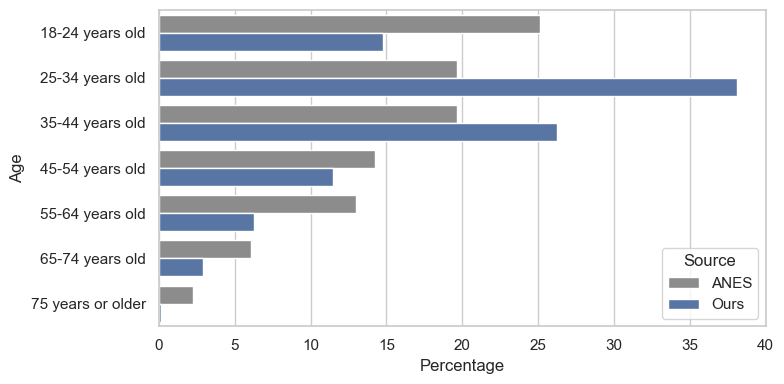

In [54]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_theme(style="whitegrid")
sns.barplot(data=age_graphable, x="pct", y="index", hue="Source", palette=[sns.color_palette()[7], sns.color_palette()[0]], ax=ax)
plt.xlabel("Percentage")
plt.ylabel("Age")
plt.tight_layout()
plt.savefig("figures/ANES/age_comparative.pdf")

## Race

In [55]:
race_df_anes = race_anes
race_df_anes["pct"] = race_df_anes["pct"] / race_df_anes["pct"].sum() * 100
race_df_anes.loc["Total"] = race_df_anes.sum()
race_df_anes["Source"] = "ANES"
race_df_anes

,weight,pct,Source
race,,,
White,712.314600,63.330073,ANES
Black or African American,98.154977,8.726709,ANES
Hispanic,173.537824,15.428805,ANES
Asian or Native Hawaiian/other Pacific Islander,69.508517,6.179825,ANES
American Indian/Alaska Native or Other,21.917879,1.948663,ANES
"Multiple races, non-Hispanic",49.331369,4.385926,ANES
Total,1124.765166,100.000000,ANES


In [56]:
race_df_proper = race_df
race_df_proper["pct"] = race_df_proper["pct"] / race_df_proper["pct"].sum() * 100
race_df_proper.loc["Total"] = race_df_proper.sum()
race_df_proper["Source"] = "Ours"
race_df_proper

,pct,weight,Source
user_summary_race,,,
American Indian/Alaska Native or Other,1.097237,8.843728,Ours
Asian or Native Hawaiian/other Pacific Islander,7.755721,62.511111,Ours
Black or African American,10.946968,88.232558,Ours
Hispanic,9.955886,80.244444,Ours
"Multiple races, non-Hispanic",3.465922,27.935330,Ours
White,66.778267,538.232828,Ours
Total,100.000000,806.000000,Ours


In [57]:
race_graphable = pd.concat([race_df_anes, race_df_proper], axis=0)
race_graphable.drop("Total", axis=0, inplace=True)
race_graphable.reset_index(inplace=True)
race_graphable

,index,weight,pct,Source
0,White,712.314600,63.330073,ANES
1,Black or African American,98.154977,8.726709,ANES
2,Hispanic,173.537824,15.428805,ANES
3,Asian or Native Hawaiian/other Pacific Islander,69.508517,6.179825,ANES
4,American Indian/Alaska Native or Other,21.917879,1.948663,ANES
5,"Multiple races, non-Hispanic",49.331369,4.385926,ANES
6,American Indian/Alaska Native or Other,8.843728,1.097237,Ours
7,Asian or Native Hawaiian/other Pacific Islander,62.511111,7.755721,Ours
8,Black or African American,88.232558,10.946968,Ours
9,Hispanic,80.244444,9.955886,Ours


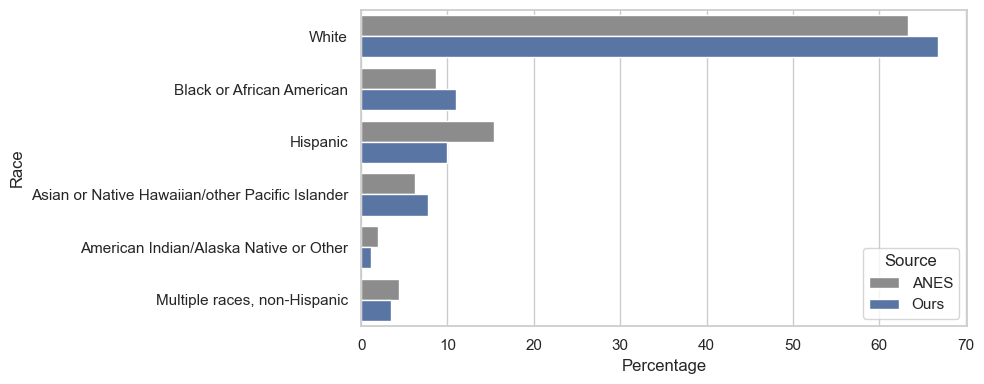

In [58]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.set_theme(style="whitegrid")
sns.barplot(data=race_graphable, x="pct", y="index", hue="Source", palette=[sns.color_palette()[7], sns.color_palette()[0]])
plt.xlabel("Percentage")
plt.ylabel("Race")
plt.tight_layout()
plt.savefig("figures/ANES/race_comparative.pdf")